## Example NoiseGrad and NoiseGrad++

With a few lines of code we show how to use NoiseGrad and NoiseGrad++ with PyTorch, as a way to enhance any explanation method. 

• **Paper:** NoiseGrad: enhancing explanations by introducingstochasticity to model weights \\
• **Authors:** Kirill Bykov\*, Anna Hedström\*, Shinichi Nakajima, Marina M.-C. Höhne \\
• **Institution:** TU Berlin, ML Department, Understandable Machine Intelligence Lab \\
• **Date:** June, 2021 \\

*equal contribution


In [ ]:
# Mount drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Installs.
!pip install captum

# Imports.
import torch
import torchvision
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from captum.attr import *
from torchvision import transforms
from drive.MyDrive.Projects.NoiseGrad.src import *

# Notebook settings.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

### Step 1. Load data and model

In [ ]:
# Load inputs and corresponding label that you want to explain.

image = transforms.ToTensor()(Image.open(f"drive/MyDrive/Projects/NoiseGrad/samples/lama_image.png")).to(device)
label = torch.load(f"drive/MyDrive/Projects/NoiseGrad/samples/lama_label.pt").to(device)

# Load pre-trained ResNet18 model.
model = torchvision.models.resnet18(pretrained=True)
weights = copy.deepcopy(model.state_dict())
model.eval();

### Step 2. Initialize methods

In [ ]:
# Initialize NoiseGrad: enhance any explanation function!
noisegrad = NoiseGrad(model=model, weights=weights, std=0.25, n=25)

# Initialize NoiseGrad++: enhance any explanation function!
noisegradp = NoiseGradPlusPlus(model=model, weights=weights, std=0.2, sg_std=0.3, n=10, m=10)

NoiseGrad initialized.
NoiseGrad++ initialized.


### Step 3. Get explanations

In [ ]:
# Get baseline explanation.
expl_base = intgrad_explainer(model.to(device), image, label)

# Get NoiseGrad explanation.
expl_ng = noisegrad.enhance_explanation(inputs=image, targets=label, explanation_fn=intgrad_explainer, **{"device": device})

# Get NoiseGrad++ explanation.
expl_ngp = noisegradp.enhance_explanation(inputs=image, targets=label, explanation_fn=intgrad_explainer, **{"device": device})

### Step 4. Visualize explanations

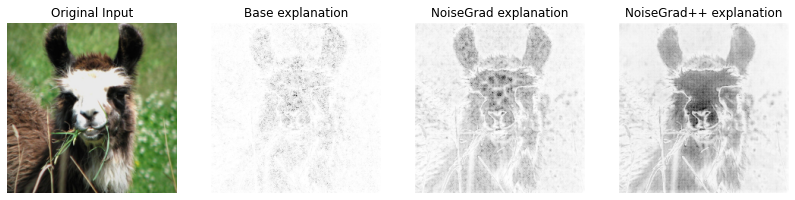

In [ ]:
# Plot!
visualize_explanations(image=image, expl_base=expl_base, expl_ng=expl_ng, expl_ngp=expl_ngp, cmap="gist_gray_r")